# Building a Multiple Linear Regression model to analyze FaceBook Advertisement Data
## Created by Tyler Chambers
### Created for APRD6432: Digital Advertising

## Project Summary

In this project we are developing a model to look at a set of advertisements ran on FaceBook. Our goal is to build a Multiple Linear Regression (MLR) model that takes several of our advertising variables and see how it impacts our advertising spend. 

## Setting up our environment and cleaning the data

In [1]:
#Importing package for use later
import pandas as pd
import seaborn as sn
import statsmodels.api as sm

#Importing the csv file, you can download it also from my github
Filename = 'Travel Pony Facebook.csv'
#Putting the file into a dataframe called tpf
tpf = pd.read_csv(Filename)

# Data Cleaning

#We need to remove the rows that have an Amount Spent of $0
tpf = tpf[tpf['Amount Spent (USD)'] != 0]

## Building a Histogram to get a sense for the data

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


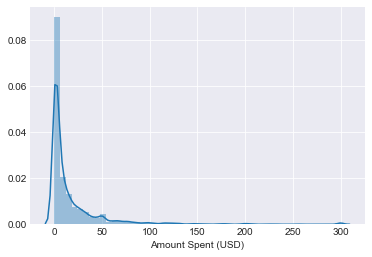

In [2]:
#We will output the histogram using seaborn as sn, setting the style to make it more readable
sn.set_style('darkgrid')
sn.distplot(tpf['Amount Spent (USD)'])
#It is easy to see the exponential relationship present in this data

## Setting up and running the MLR model

In [3]:
#First we need to set up campaigns as a categorical variable
tpf['Campaign Name'] = tpf['Campaign Name'].astype('category')
tpf['Campaign_Code'] = tpf['Campaign Name'].cat.codes

#Next we need to assign our variables 
X = tpf[['Campaign_Code', 'Reach', 'Frequency', 'Impressions', 'Clicks', 'Unique Clicks', 'Page Likes', 'Page Engagement', 'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares', 'Photo Views', 'Website Clicks']]
Y = tpf[['Amount Spent (USD)']]

#Now we are running the actual regression, we saved the regression as MLR 
print('\nMultiple Linear Regression Using OLS')
print('-------------------------------------')
MLR = sm.OLS(Y, X).fit()
print(MLR.summary())


Multiple Linear Regression Using OLS
-------------------------------------
                            OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2211.
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:42:49   Log-Likelihood:                -6605.9
No. Observations:                1802   AIC:                         1.324e+04
Df Residuals:                    1789   BIC:                         1.331e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

We can see from the above output that 'Page Likes' and 'Post Engagement' have strong positive coefficients when compared to 'Amount Spent', showing that increases in these values drastically effects our advertising expenditure. Interestingly, this model shows that 'Page Engagement' actually has a strongly negative affect on 'Amount Spent', perhaps indicating that campaigns that recieved heavy page engagement cost us less. A possible explanation is that these campaigns hit their conversion goals sooner, and thus resulted in a lower advertising spend. Only two variables appear insignificant at the .05 alpha level, those being 'Post Likes' and 'Clicks'. Finally it is worth noting that this model has elements of mulitcollinearity present, and thus future explorations might be better off with fewer independent variables.